In [1]:
import os 
os.chdir("/home/dahala/InsarPrediction")
import tensorflow as tf
import json
import numpy as np
import seaborn as sns
from src import preparedata
from src import modelinsar
from src import traininsar
import matplotlib.pyplot as plt
print("json imported")
dir="/home/dahala/InsarPrediction"

2023-08-11 12:56:13.433529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 12:56:13.610594: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 12:56:13.665474: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-11 12:56:15.662250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

json imported


In [2]:
params=json.load(open('params/paramsv2.json','r'))
dataset=preparedata.readInsarData(params['dataprepinargs'])
dataset.preparedata()

Time  1


KeyError: "['snowcover', 'TWS'] not in index"

<AxesSubplot: ylabel='Count'>

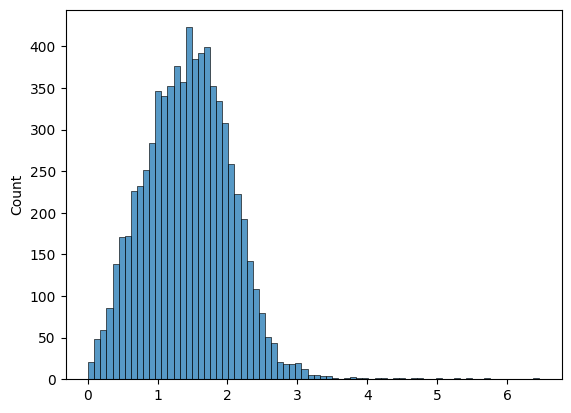

In [ ]:
sns.histplot(dataset.Ytrain)

0.07530878530714069
-0.13693159603664706


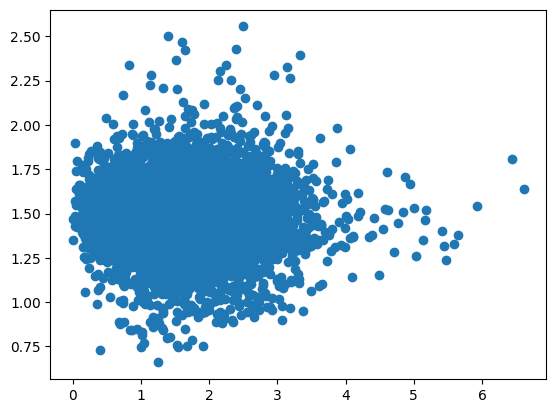

In [ ]:
#test basic model
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(dataset.Xtrain, dataset.Ytrain)
out=regr.predict(dataset.Xtest)
print(regr.score(dataset.Xtrain, dataset.Ytrain))
print(regr.score(dataset.Xtest, dataset.Ytest))
plt.scatter(x=dataset.Ytest.flatten(),y=out.flatten())
# plt.xlim(0,8)
# plt.ylim(0,8)
# plt.axis('squared')

0.07051547643557943
-0.08341729845359525


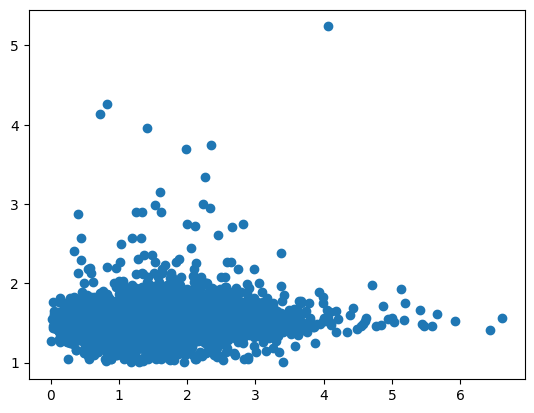

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
regr = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42
).fit(dataset.Xtrain, dataset.Ytrain)
out=regr.predict(dataset.Xtest)
print(regr.score(dataset.Xtrain, dataset.Ytrain))
print(regr.score(dataset.Xtest, dataset.Ytest))
plt.scatter(x=dataset.Ytest.flatten(),y=out.flatten())

In [ ]:
landslidehazard=modelinsar.insarpred(params['modelparam'])
landslidehazard.preparemodel()

traininsar.trainmodel(landslidehazard.model,dataset.Xtrain,dataset.Ytrain,params['trainparam'])

Epoch 1/100


39/52 [=====================>........] - ETA: 0s - loss: 1.4166 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 1.4166
Epoch 1: val_loss improved from inf to 1.62393, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets
52/52 [==============================] - 2s 27ms/step - loss: 1.4156 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 1.4156 - val_loss: 1.6239 - val_mean_absolute_percentage_error: 100.0000 - val_mean_absolute_error: 1.6239
Epoch 2/100
46/52 [=========================>....] - ETA: 0s - loss: 1.4137 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 1.4137
Epoch 2: val_loss did not improve from 1.62393
52/52 [==============================] - 0s 3ms/step - loss: 1.4156 - mean_absolute_percentage_error: 100.0000 - mean_absolute_error: 1.4156 - val_loss: 1.6239 - val_mean_absolute_percentage_error: 100.0000 - val_mean_absolute_error: 1.6239
Epoch 3/100
45/52 [========================>.....] - 

 64/230 [=======>......................] - ETA: 0s

230/230 [==============================] - 0s 1ms/step


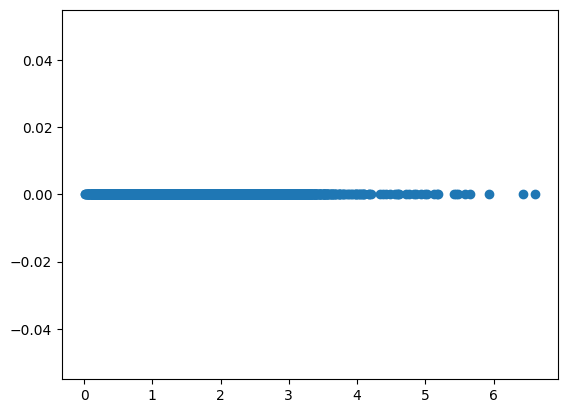

In [ ]:
plt.scatter(x=dataset.Ytest.flatten(),y=landslidehazard.model.predict(dataset.Xtest).flatten())
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.axis('squared')

In [ ]:
#test with stat model